In [ ]:
#Author: @Rita_Mulato

#Date: 2025-08-08
#Version: 1.0

#try:
#   from wordcloud import WordCloud
#except ModuleNotFoundError:
#    !pip install wordcloud
#   from wordcloud import WordCloud

from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style='whitegrid')

In [41]:
df = pd.read_csv('../data/NetflixDataset.csv', encoding='latin1')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

In [ ]:
df.describe()

In [15]:
#most-watched movie (Assuming 'TITLE' with the most occurrences is the most popular)
most_watched = df['Title'].value_counts().idxmax()
print(f"The most watched movie is: {most_watched}")

The most watched movie is: The Lost Okoroshi


In [ ]:
#category more view
plt.figure(figsize=(10,5))
df['Category'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [ ]:
##Dynamic - Category more view
#  1. Pre processing
top_categories = df['Category'].value_counts().head(10).reset_index()
top_categories.columns = ['Category', 'Count']  # Rename columns

# 2. Interactive chart
fig = px.bar(top_categories,
             x='Count',
             y='Category',
             orientation='h',  # Horizontal bars
             color='Count',  # Cor mapping
             color_continuous_scale='Blues',  # color scale
             title='Top 10 Categories on Netflix',
             labels={'Count': 'Title number', 'Category': 'Category'},
             text_auto=True)  # show values in bars

# 3. Extra customization
fig.update_layout(
    hovermode='y',  # Highlight on mouseover
    yaxis={'categoryorder': 'total ascending'},  # Sort by value
    height=500,
    width=800
)

fig.show()

In [ ]:
#Static - Top 10 Most Productive Directrs
director_stats = df['Director'].value_counts()
productive_directors = director_stats[director_stats > 1]

if not productive_directors.empty:
    most_productive = productive_directors.idxmax()
    director_works = df[df['Director'] == most_productive]
    most_popular_work = director_works['Title'].value_counts().idxmax()

    print(f"\n3 . Most productive director: {most_productive}")
    print(f"Most popular work of {most_productive}: {most_popular_work}")

    plt.figure(figsize=(10,6))
    productive_directors.head(10).plot(kind='bar', color='lightgreen')
    plt.title('Top 10 Most Productive Directrs')
    plt.ylabel('Number of productions')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Dynamic - Top 10 Most Productive Directrs
director_stats = df['Director'].dropna().value_counts().reset_index()
director_stats.columns = ['Director', 'Count']
productive_directors = director_stats[director_stats['Count'] > 1]

if not productive_directors.empty:
    fig = px.bar(productive_directors.head(10),
                 x='Count',
                 y='Director',
                 orientation='h',
                 color='Count',
                 title='Top 10 Most Productive Directors (2+ works)',
                 labels={'Count': 'Number of Works', 'Director': 'Director'},
                 color_continuous_scale='Aggrnyl')
    fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                      height=500)
    fig.show()
else:
    print("No directors with more than one work found.")

In [ ]:
#Dynamic - Top 10 Most Productive Directrs

# 1. Director analysis (with NaN treatment)
director_stats = df['Director'].dropna().value_counts() 
productive_directors = director_stats[director_stats > 1].reset_index()
productive_directors.columns = ['Director', 'Works_Count']

if not productive_directors.empty:
    most_productive = productive_directors.loc[0, 'Director']
    
    director_works = df[df['Director'] == most_productive]
    most_popular_work = director_works['Title'].value_counts().idxmax()
    
    print(f"\nMost Productive Director: {most_productive}")
    print(f"Most Popular Work: {most_popular_work}")

    # 2. Iterative chart
    fig = px.bar(productive_directors.head(10),
                 x='Works_Count',
                 y='Director',
                 orientation='h',
                 color='Works_Count',
                 color_continuous_scale='Tealgrn',
                 title='Top 10 Most Productive Directors (2+ Works)',
                 labels={'Works_Count': 'Number of Productions', 'Director': ''},
                 text='Works_Count',
                 hover_data={'Director': True, 'Works_Count': ':.0f'})
    
    # 3. Customization
    fig.update_layout(
        yaxis={'categoryorder': 'total ascending'},
        height=500,
        hoverlabel=dict(bgcolor="white", font_size=12),
        coloraxis_showscale=False
    )
    
    fig.update_traces(textposition='outside')
    fig.show()

    # 4. Additional chart: Works by the most prolific director
    if not director_works.empty:
        fig2 = px.bar(director_works['Title'].value_counts().reset_index(),
                     x='count',
                     y='Title',
                     orientation='h',
                     title=f'Works by {most_productive}',
                     labels={'count': 'Appearances', 'Title': 'Work Title'})
        
        fig2.update_layout(yaxis={'categoryorder': 'total ascending'})
        fig2.show()
else:
    print("No directors with more than 1 work found.")

In [ ]:
#Normal time for the movies or tv shown
df['Type'] = df['Type'].str.strip().str.title()

df['Duration'] = df['Duration'].astype(str)
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)', expand=False).astype(float)

duration_stats = df.groupby('Type')['Duration_Numeric'].mean()
print(f"\n4. Mean Duration: ")
print(f"   Filmes: {duration_stats.get('Movie', 'N/A')} minutos")
print(f"   Séries: {duration_stats.get('Tv Show', duration_stats.get('TV Show', 'N/A'))} temporadas")

plt.figure(figsize=(10, 5))
sns.barplot(x=duration_stats.index, y=duration_stats.values, palette="coolwarm")
plt.title('Mean Duration for Movies and TV Shows')
plt.ylabel('Duration')
plt.xlabel('Type')
plt.show()

WordCloud warning: Only supported for TrueType fonts

Top 10 most frequent words:
the: 7163 occurrences
and: 5582 occurrences
his: 3011 occurrences
with: 1969 occurrences
her: 1803 occurrences
for: 1559 occurrences
their: 1470 occurrences
when: 1321 occurrences
this: 1245 occurrences
from: 1115 occurrences


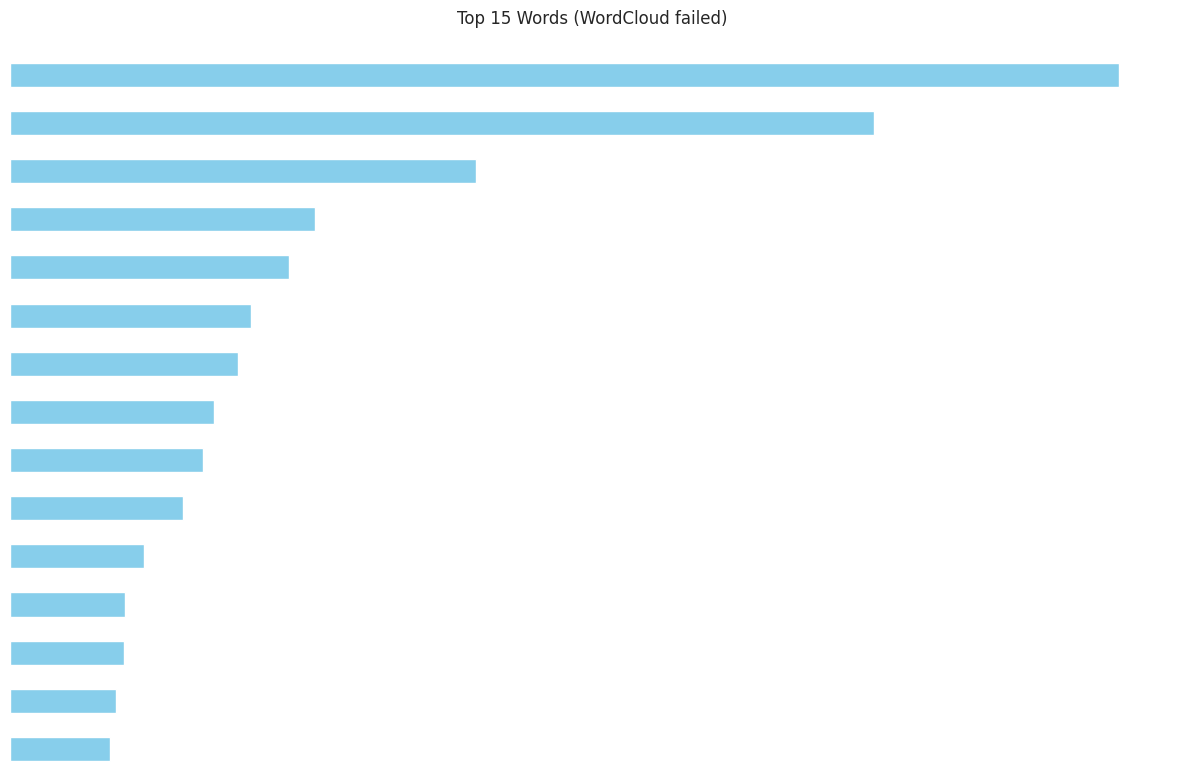

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

def safe_wordcloud_generator(text, title='Word Cloud'):
    """Generate wordcloud with multiple fallback options"""
    try:
        # First attempt with default font
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            collocations=False,
            regexp=r"\w[\w']+",
            font_path=None  # Use system default font
        )
        wc.generate(text)
        return wc
    except Exception as e:
        print(f"WordCloud warning: {str(e)}")
        return None

try:
    # 1. Initial DataFrame validation
    if 'Description' not in df.columns:
        raise ValueError("Column 'Description' not found in DataFrame")
    
    # 2. Robust preprocessing
    descriptions = df['Description'].dropna().astype(str)
    if len(descriptions) == 0:
        raise ValueError("No valid descriptions available")
    
    # 3. Text cleaning
    all_descriptions = ' '.join(
        desc.lower().strip() for desc in descriptions 
        if isinstance(desc, str) and desc.strip()
    )
    
    if not all_descriptions:
        raise ValueError("Only empty strings after cleaning")

    # 4. Word analysis
    words = [word for word in all_descriptions.split() if len(word) > 2]
    if not words:
        raise ValueError("No valid words after filtering")

    # 5. WordCloud generation with fallback
    wordcloud = safe_wordcloud_generator(all_descriptions)
    
    # 6. Visualization
    plt.figure(figsize=(12, 8), dpi=100)
    
    if wordcloud:
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title('Most Frequent Words in Descriptions', pad=20)
    else:
        # Fallback to bar chart
        top_words = pd.Series(Counter(words)).nlargest(15)
        top_words.sort_values().plot.barh(color='skyblue')
        plt.title('Top 15 Words (WordCloud failed)', pad=20)
        plt.xlabel('Count')
    
    plt.axis('off')
    plt.tight_layout()

    # 7. Text analysis
    common_words = Counter(words).most_common(10)
    print("\nTop 10 most frequent words:")
    for word, count in common_words:
        print(f"{word}: {count} occurrences")
    
    plt.show()

except Exception as e:
    print(f"\nError: {str(e)}")
    
    # Debug information
    print("\nDebug Info:")
    print(f"- DataFrame columns: {df.columns.tolist()}")
    print(f"- Description dtype: {df['Description'].dtype if 'Description' in df.columns else 'N/A'}")
    print(f"- Sample descriptions: {df['Description'].head(3).tolist() if 'Description' in df.columns else 'N/A'}")

In [ ]:
all_actors = []
for cast in df['Cast'].dropna():
    actors = [x.strip() for x in cast.split(',')]
    all_actors.extend(actors)

actor_counts = pd.Series(all_actors).value_counts()
prolific_actors = actor_counts[actor_counts >= 3]

print("\n6. Atores em pelo menos 3 produções:")
print(prolific_actors.head(10))

# Visualização interativa de atores
fig = px.bar(prolific_actors.head(20), 
             x=prolific_actors.head(20).index,
             y=prolific_actors.head(20).values,
             labels={'y':'Número de Produções', 'x':'Ator'},
             title='Atores Mais Frequentes na Netflix (≥3 produções)',
             color=prolific_actors.head(20).values,
             color_continuous_scale='Viridis')
fig.show()